# Data Preparation

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Rading Data Set
data = pd.read_csv("./DataSet/mnist_train.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
#Storing Label in variable label
label = data['label']

#Droping column label from dataset
data = data.drop('label',axis = 1)

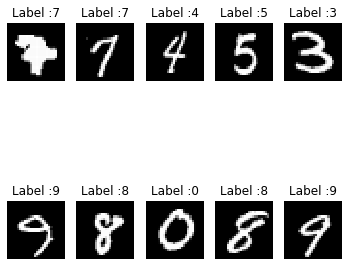

In [4]:
# Visualising 10 random sample from training data
indexes = np.random.randint(0, data.shape[0], size=10)

# plot the 10 mnist digits
plt.figure(figsize=(6, 6))
for i in range(len(indexes)):
    sub = plt.subplot(2, 5, i + 1)
    image = data.iloc[indexes[i]].to_numpy().reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    sub.set_title("Label :" + str(label[indexes[i]]))
plt.show()
plt.close('all')

# 1) Implement k-means clustering. Analyse the clusters formed for various values of k. Display the centroids of the clusters.


In [5]:
# Picking first 10000 points from data set
label_new = label.head(10000)
data_new = data.head(10000)

In [6]:
# Number of training data 
n = data_new.shape[0]

# Number of feature in data
c = data_new.shape[1]

# Converting data into numpy array
data_new = np.array(data_new)

# Finding mean and standard deviation.
# It is used latter For finding centers
mean = np.mean(data_new, axis = 0)
std = np.std(data_new, axis = 0)

In [7]:
# Function to calculate distance between two points
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): 
    for ix in range(data_new.shape[0]):
        dist = []
        curr_x = data_new[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)

In [9]:
# We update every cluster center according to the mean of the points in it        
def updateClusters(clusters):  
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list

In [10]:
# This Function plot image of all centroid and 4 random center corresponding to that cluster.

def plotting(k,clusters):
    plt.figure(figsize=(20, 20))
    count = 1
    for i in range(k):
        sub = plt.subplot(k, 5,count)
        image = clusters[i]['center'].reshape(28,28)
        plt.imshow(image, cmap='gray')
        sub.set_title("Centroid " + str(i+1))
        plt.subplots_adjust(hspace=0.4)
        plt.axis('off')
        count +=1

        px = np.random.randint(0, len(clusters[i]['points']), size=4)

        for j in px:
            sub = plt.subplot(k, 5,count)
            image = clusters[i]['points'][j].reshape(28,28)
            plt.imshow(image, cmap='gray')
            sub.set_title("Image from Cluster " + str(i+1))
            plt.subplots_adjust(hspace=0.8)
            plt.axis('off')
            count +=1

    plt.savefig('KMEAN_'+ str(k) +'.png')
    plt.show()
    plt.close('all')

## For K = 10

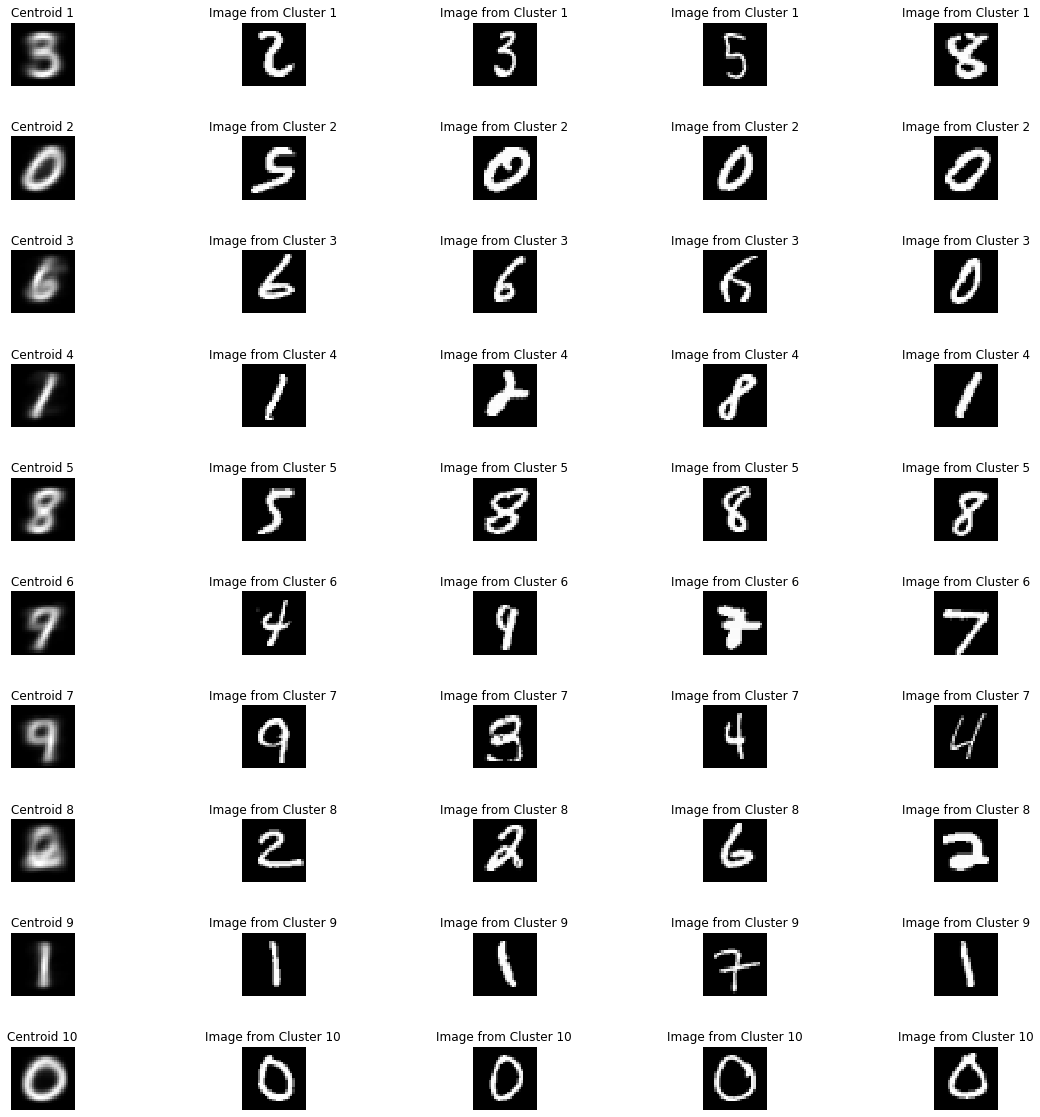

In [11]:
# Initializing Number of cluster
k = 10

# initializing random sample using mean and standard deviation
center = np.random.randn(k,c)*std + mean

#Creating Empty dictionary Cluster Which will store all information about clusters we are getting
#In cluster dictionary we are storing centroid in center list and points corresponding to that centroid in points list
clusters = {}

for i in range(k):
    points = []
    cluster = {
        'center':list(center[i]),
        'points':points
        }
    clusters[i] = cluster
    

# Updating cluster random number of times so that centeriod value stabilize
for i in range(25):
    updateClusters(clusters)
    assignPointToClusters(clusters)

# Plotting Centroids
plotting(k,clusters)

## For k = 15

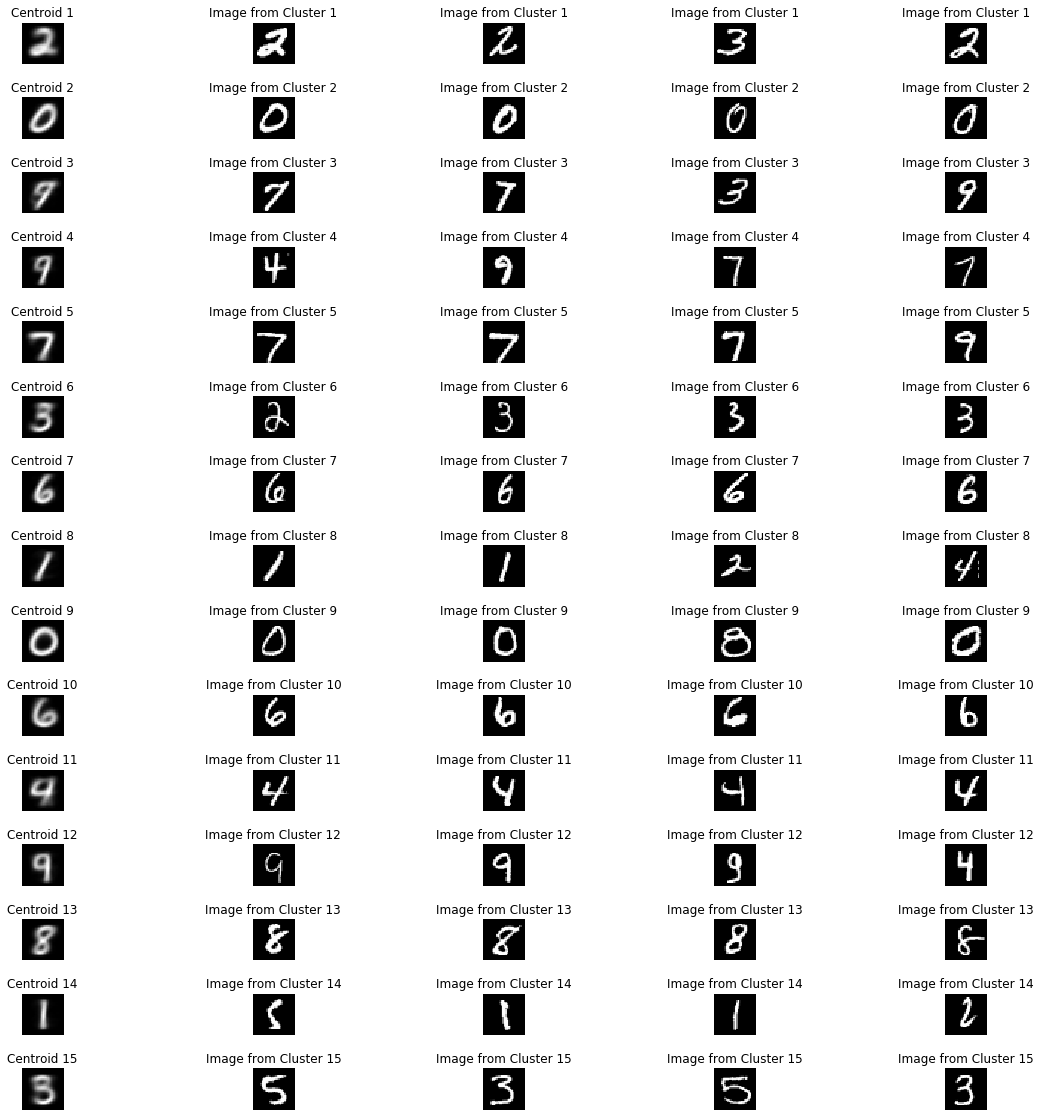

In [12]:
# Initializing Number of cluster
k = 15

# initializing random sample using mean and standard deviation
center = np.random.randn(k,c)*std + mean

#Creating Empty dictionary Cluster Which will store all information about clusters we are getting
#In cluster dictionary we are storing centroid in center list and points corresponding to that centroid in points list
clusters = {}

for i in range(k):
    points = [] 
    cluster = {
        'center':list(center[i]),
        'points':points
        }
    clusters[i] = cluster
    

# Updating cluster random number of times so that centeriod value stabilize
for i in range(25):
    updateClusters(clusters)
    assignPointToClusters(clusters)

# Plotting Centroids
plotting(k,clusters)

## For k = 20

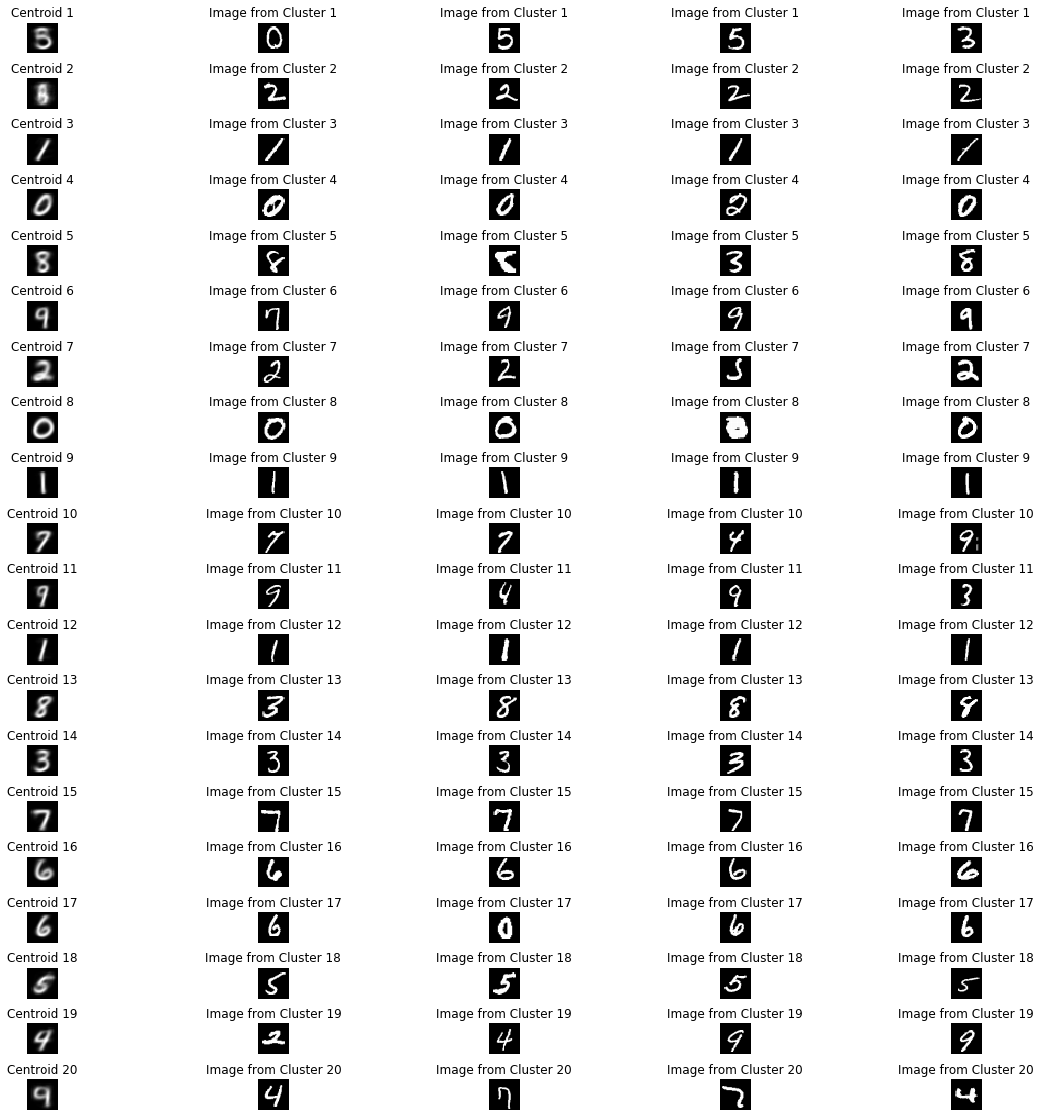

In [14]:
# Initializing Number of cluster
k = 20

# initializing random sample using mean and standard deviation
center = np.random.randn(k,c)*std + mean

#Creating Empty dictionary Cluster Which will store all information about clusters we are getting
#In cluster dictionary we are storing centroid in center list and points corresponding to that centroid in points list
clusters = {}

for i in range(k):
    points = []
    cluster = {
        'center':list(center[i]),
        'points':points
        }
    clusters[i] = cluster
    

# Updating cluster random number of times so that centeriod value stabilize
for i in range(25):
    updateClusters(clusters)
    assignPointToClusters(clusters)

# Plotting Centroids
plotting(k,clusters)

# 2. Implement Dimensionality reduction using PCA. Analyse the reconstruction error for various values of k. Display the Eigen Vectors.

In [18]:
# Standardizing the data
label = label.head(15000)
data = data.head(15000)

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [19]:
#finding co-variance matrix which is : A^T * A
# Shape of covarience matrix  =  (784,42000) x (42000,784) = (784,784)

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [20]:
'''
 Below we use 'eigh' function will return the eigen values in asending order.
 Eigen values are stored in 'e_values' and corresponding Eigen vectors are stored in 'e_vectors'.
 
 Here, we are projecting data to 2 Dimension. Therefore we choose two largest values
 i.e values corresponding to index 782 and 783
 
'''


from scipy.linalg import eigh 

e_values, e_vectors = eigh(covar_matrix,eigvals=(782,783))
e_vectors = e_vectors.T
e_vectors.shape


(2, 784)

In [21]:
''' 
 Projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication.
 Shape of result matrix  =  (2, 784) X (784, 42000)  =  (2, 42000)
'''

result = np.matmul(e_vectors, sample_data.T)
temp_result = result


In [22]:
# appending label to the 2d projected data
result = np.vstack((result, label)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=result, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


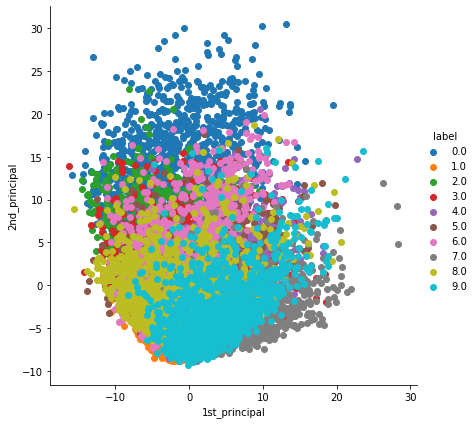

In [23]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.show()

### Reconstructing 784 dimension data using principle components

In [24]:
sample_data.shape

(15000, 784)

In [25]:
temp_result.shape

(2, 15000)

In [26]:
e_vectors.shape

(2, 784)

In [27]:
recons_data = np.matmul(temp_result.T, e_vectors)

In [28]:
recons_data = (recons_data + mean)*std

In [29]:
recons_data.shape

(15000, 784)

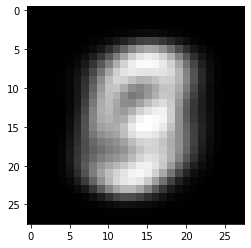

In [30]:
# Reconstructed Image
# Image is blurr due to reconstruction error
im = recons_data[1].reshape(28,28)
plt.imshow(im,cmap='gray')
plt.savefig('Reconstructed_image.jpg')
plt.show()